In [10]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [11]:
%run 'cross_validation/functions.ipynb'

In [12]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [13]:
import plotly.graph_objects as go

hyperparameters = {'n_estimators': 120, 'max_depth': 10, 'max_features': 'sqrt'}

In [14]:
predict_cruise(hyperparameters)

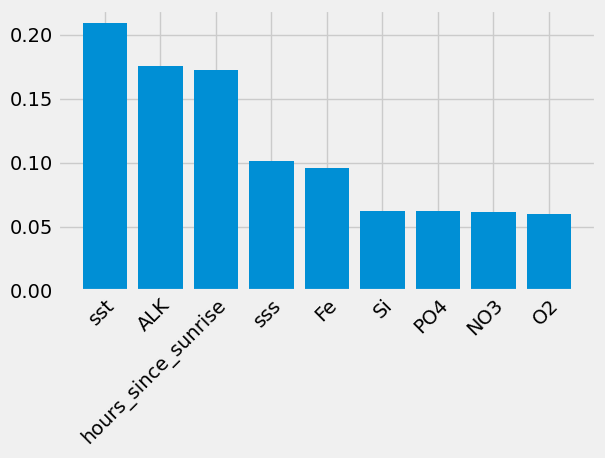

In [15]:
feature_importance()

In [16]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

####  Removing O2 and NO3 as they were the worst performing nutrients

In [17]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)


In [18]:
predict_cruise(hyperparameters)

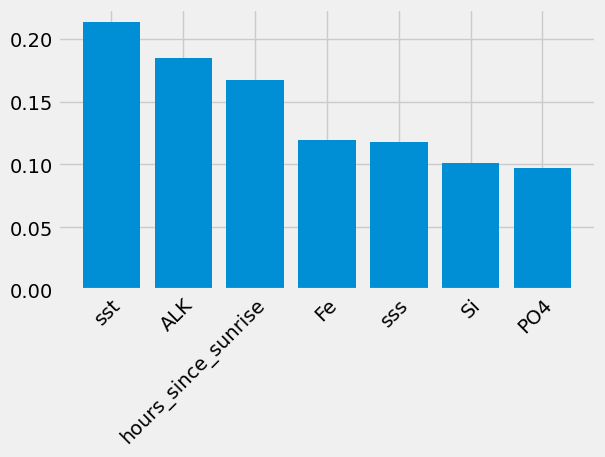

In [19]:
feature_importance()

In [20]:
predictions, maes, rmses, nutrient_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

#### Now we will see whether removing features with low importance improves the accuracy of the model

In [21]:
list_of_rmse = {'original': old_rmse,  
                'nutrients': nutrient_rmse}
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['nutrients'])/sorted_rmse['original'] * 100, '%' )

{'nutrients': 2.8826839560859816, 'original': 2.927390985963467}
the percent improvement is: 1.5271970875038807 %


####  Although not a big difference, removing those 2 variables had a ~1% improvement in model performance.  
#### Now we will try removing everything but the 5 highest performing variables, which are ALK, SSS, SST, Hours, and Fe

In [22]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2', 'Si', 'PO4'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [23]:
predict_cruise(hyperparameters)

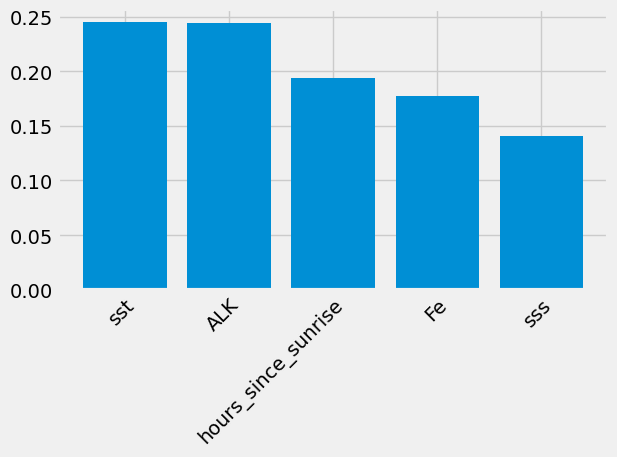

In [24]:
feature_importance()

In [25]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

In [26]:
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.841171765009491, 'nutrients': 2.8826839560859816, 'original': 2.927390985963467}
the percent improvement is: 2.9452581280528625 %


#### Since this was only a 3% improvement, we can't say for certain whether this will help or hurt the accuracy of our final predictions

### Now we will remove hours_since_sunrise, since it is not useful for the global predictions that we will be doing later

In [32]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [33]:
predict_cruise(hyperparameters)

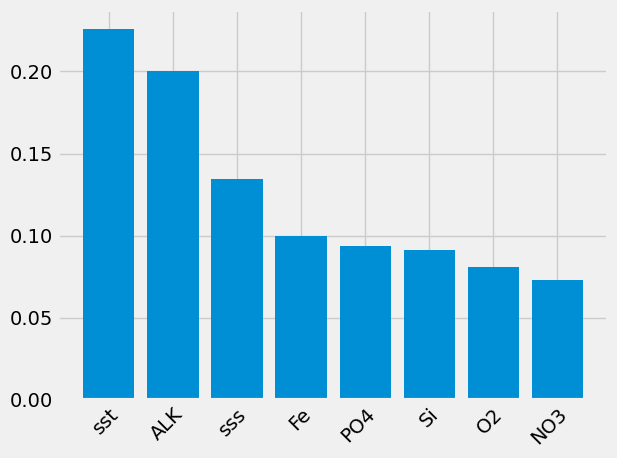

In [34]:
feature_importance()

In [35]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features)

In [36]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.841171765009491, 'nutrients': 2.8826839560859816, 'original': 2.927390985963467, 'sunrise': 3.2140657096393346}
the percent improvement is: -9.792840281685741 %


Removing hours_since_sunrise remove's the models ability to predict the diurnal cycle of prochlorococcus, so the model has a ~10% higher RMSE